In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from Ipython.display import HTML

from tensorflow import keras
from keras.datasets.mnist import load_data

In [2]:
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
boston = load_boston()

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
feature = pd.DataFrame(boston.data, columns = boston.feature_names)
feature

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
feature['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [10]:
target = pd.DataFrame(boston.target, columns = ['target'])
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
max(target['target'])

50.0

In [12]:
min(target['target'])

5.0

In [13]:
df = pd.concat([target, feature], axis = 1)
df

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,20.6,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [14]:
df.describe().round(decimals = 2)

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,22.53,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,9.20,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,5.00,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,17.02,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,21.20,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,25.00,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96
max,50.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [15]:
#calcluated correlation b/w every column of data
corr = df.corr('pearson')
corr

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
target,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


In [16]:
#calculated absolute values of correlation
corrs = [abs(corr[attr]['target']) for attr in list(feature)]
print(corrs)

[0.3883046085868114, 0.3604453424505447, 0.483725160028373, 0.1752601771902975, 0.4273207723732817, 0.6953599470715389, 0.3769545650045959, 0.24992873408590394, 0.3816262306397776, 0.46853593356776646, 0.507786685537561, 0.33346081965706653, 0.7376627261740143]


In [17]:
#make a list of pairs
l = list(zip(corrs, list(feature)))
print(l)

[(0.3883046085868114, 'CRIM'), (0.3604453424505447, 'ZN'), (0.483725160028373, 'INDUS'), (0.1752601771902975, 'CHAS'), (0.4273207723732817, 'NOX'), (0.6953599470715389, 'RM'), (0.3769545650045959, 'AGE'), (0.24992873408590394, 'DIS'), (0.3816262306397776, 'RAD'), (0.46853593356776646, 'TAX'), (0.507786685537561, 'PTRATIO'), (0.33346081965706653, 'B'), (0.7376627261740143, 'LSTAT')]


In [18]:
#sort the list of pairs to to obtain correlation
l.sort(key = lambda x : x[0], reverse = True)
print(l)

[(0.7376627261740143, 'LSTAT'), (0.6953599470715389, 'RM'), (0.507786685537561, 'PTRATIO'), (0.483725160028373, 'INDUS'), (0.46853593356776646, 'TAX'), (0.4273207723732817, 'NOX'), (0.3883046085868114, 'CRIM'), (0.3816262306397776, 'RAD'), (0.3769545650045959, 'AGE'), (0.3604453424505447, 'ZN'), (0.33346081965706653, 'B'), (0.24992873408590394, 'DIS'), (0.1752601771902975, 'CHAS')]


In [19]:
#unzip  pairs for two tables
corrs, labels = list(zip(*l))
print(corrs, labels)

(0.7376627261740143, 0.6953599470715389, 0.507786685537561, 0.483725160028373, 0.46853593356776646, 0.4273207723732817, 0.3883046085868114, 0.3816262306397776, 0.3769545650045959, 0.3604453424505447, 0.33346081965706653, 0.24992873408590394, 0.1752601771902975) ('LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B', 'DIS', 'CHAS')


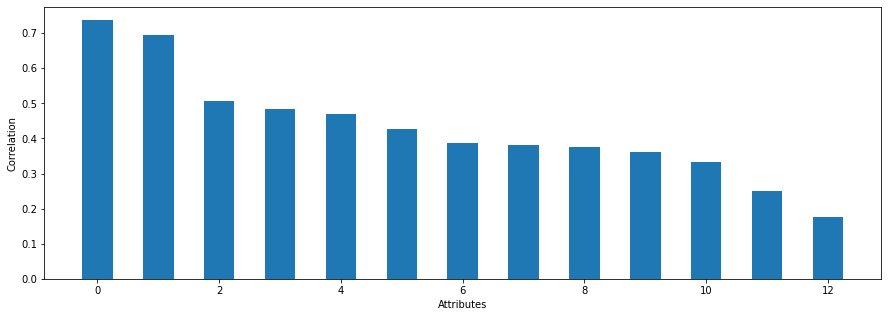

In [20]:
#plot correlation wrt to target variable
index = np.arange(len(labels))
plt.figure(figsize = (15, 5))
plt.bar(index, corrs, width = 0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.show()

In [21]:
x = df['LSTAT'].values
y = df['target'].values

In [22]:
#before normalization
print(y[:5])

[24.  21.6 34.7 33.4 36.2]


In [23]:
x_scaler = MinMaxScaler()
x = x_scaler.fit_transform(x.reshape(-1, 1))
x = x[:-1]
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.reshape(-1, 1))
y = y[:-1]

In [24]:
#after normalization
print(y[:5])

[[0.42222222]
 [0.36888889]
 [0.66      ]
 [0.63111111]
 [0.69333333]]


In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2)

In [26]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * ((m * x + c) - t) * x)
    grad_c = sum(2 * ((m * x + c) - t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

In [27]:
def error(m, x, c, t):
    N = x.size
    e = sum(((m * x + c) - t) ** 2)
    return e - (1 / (2 * N))

In [28]:
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_value = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print('Error less than threshold, stop gradient descent')
            break
        error_value.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_value, mc_values
m, c, error_values, mc_values = gradient_descent(init_m, init_c, x, y, learning_rate, iterations, error_threshold)

In [29]:
mc_values_anim = mc_values[0 : 250 : 5]

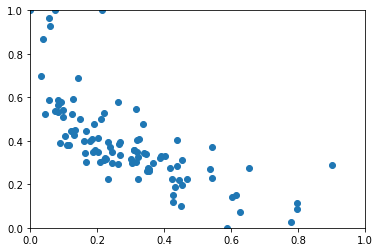

In [30]:
fig, ax = plt.subplots()
ln, = plt.plot([], [], 'ro-', animated = True)

def init():
    plt.scatter(xtest, ytest)
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 1.0)
    return ln,
def update_frame(frame):
    m, c = mc_values_anim[frame]
    x1, y1 = -0.5, m * -0.5 + c
    x2, y2 = 1.5, m * 1.5 + c
    ln.set_data([x1, x2], [y1, y2])
    return ln,

anim = FuncAnimation(fig, update_frame, frames = range(len(mc_values_anim)), init_func = init, blit = True)
#HTML(anim.to_html5_video())

Text(0.5, 1.0, 'Graph of best fit line')

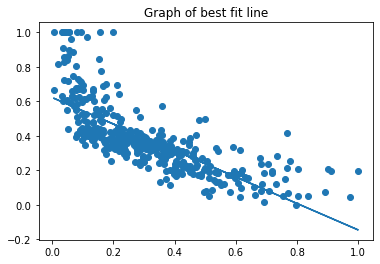

In [31]:
plt.scatter(xtrain, ytrain)
plt.plot(xtrain, (m * xtrain + c))
plt.title('Graph of best fit line')

In [32]:
print(np.arange(len(error_values)))
print(min(error_values))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Text(0.5, 0, 'Iteration')

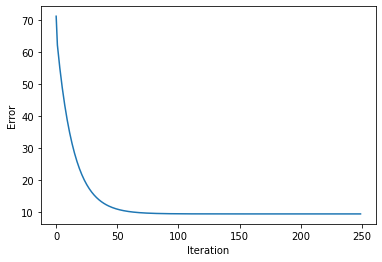

In [33]:
#plot error values
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Error')
plt.xlabel('Iteration')

In [34]:
#calculate prediction on test set as a vectorized operation
predicted = (m * xtest) + c
predicted

array([[ 0.20405522],
       [ 0.36219296],
       [ 0.28555861],
       [ 0.53155065],
       [ 0.17166556],
       [ 0.56542219],
       [ 0.45068235],
       [ 0.29487328],
       [ 0.47799128],
       [ 0.32070033],
       [ 0.46147891],
       [ 0.51863713],
       [ 0.50741718],
       [ 0.37214272],
       [ 0.52668162],
       [ 0.45301102],
       [ 0.55166188],
       [ 0.45872684],
       [ 0.41850439],
       [ 0.49323347],
       [ 0.3003774 ],
       [ 0.02368928],
       [ 0.20892425],
       [ 0.55801279],
       [ 0.38717322],
       [ 0.43395828],
       [ 0.44306126],
       [ 0.00971727],
       [ 0.28153636],
       [ 0.54192381],
       [ 0.37341291],
       [ 0.55293206],
       [ 0.37976382],
       [ 0.54615775],
       [ 0.38463285],
       [ 0.41998627],
       [ 0.00992896],
       [-0.06945745],
       [ 0.35986429],
       [ 0.37595327],
       [ 0.20384352],
       [ 0.35478356],
       [ 0.59738845],
       [ 0.49323347],
       [ 0.41935118],
       [ 0

In [35]:
#calculate MSE  for predicted values
mean_squared_error(ytest, predicted)

0.019586153046007537

In [36]:
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns = ['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,predicted_y
0,[0.5441501103752759],[0.23111111111111116],[0.20405521693277717]
1,[0.3380242825607064],[0.47555555555555556],[0.36219296028849296]
2,[0.43791390728476826],[0.4022222222222223],[0.2855586054092839]
3,[0.11727373068432673],[0.38000000000000006],[0.5315506506292862]
4,[0.5863686534216335],[0.0],[0.17166555865510053]


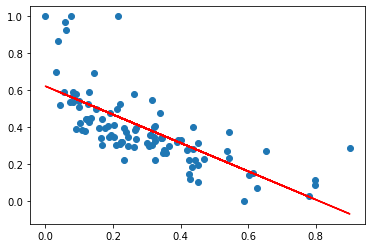

In [37]:
plt.scatter(xtest, ytest)
plt.plot(xtest, predicted, color = 'r')

In [38]:
#reshape the data required by scaler
predicted = predicted.reshape(-1, 1)
xtest = xtest.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)
xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

In [39]:
#construct dataframe to remove extra dimension
xtest_scaled = xtest_scaled[: -1]
ytest_scaled = ytest_scaled[: -1]
predicted_scaled = predicted_scaled[: -1]
p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns = ['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head()

,x,target_y,predicted_y
0,[21.450000000000003],[15.4],[14.182484761974973]
1,[13.98],[26.4],[21.298683212982183]
2,[17.6],[23.1],[17.850137243417773]
3,[5.98],[22.1],[28.91977927831788]
4,[22.98],[5.0],[12.724950139479523]


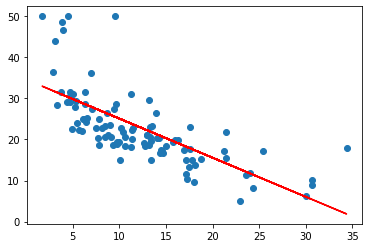

In [40]:
plt.scatter(xtest_scaled, ytest_scaled)
plt.plot(xtest_scaled, predicted_scaled, color = 'r')

In [41]:
data = load_data()
data

11493376/11490434 [==============================] - 17s 2us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [43]:
(train_images, train_labels), (test_images, test_labels) = data

In [45]:
np.shape(data)

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(2, 2)

In [46]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [47]:
train_labels[0]

5

In [48]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [56]:
print('Minimum pixel value:', train_images[0].min())
print('Maximum pixel value:', train_images[0].max())
print('Shape of training data:', train_images.shape)
print('Shape of each training data:', train_images[0].shape)
print('Shape of testing data:', test_images.shape)
print('Shape of each testing data:', test_images[0].shape)

Minimum pixel value: 0
Maximum pixel value: 255
Shape of training data: (60000, 28, 28)
Shape of each training data: (28, 28)
Shape of testing data: (10000, 28, 28)
Shape of each testing data: (28, 28)


In [57]:
print(train_labels[1])

0


In [59]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [60]:
print(train_images[1, 5:23, 5:23])

[[  0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0]
 [  0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0]
 [  0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0]
 [  0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0]
 [  0   0   0   0   0  51 238 253 253 190 114 253 228  47  79 255 168   0]
 [  0   0   0   0  48 238 252 252 179  12  75 121  21   0   0 253 243  50]
 [  0   0   0  38 165 253 233 208  84   0   0   0   0   0   0 253 252 165]
 [  0   0   7 178 252 240  71  19  28   0   0   0   0   0   0 253 252 195]
 [  0   0  57 252 252  63   0   0   0   0   0   0   0   0   0 253 252 195]
 [  0   0 198 253 190   0   0   0   0   0   0   0   0   0   0 255 253 196]
 [  0  76 246 252 112   0   0   0   0   0   0   0   0   0   0 253 252 148]
 [  0  85 252 230  25   0   0   0   0   0   0   0   0   7 135 253 186  12]
 [  0  85 252 223   0   0   0   0   0   0   0   0   7 131 252 225  71   0]
 [  0  85 252 145   0   0

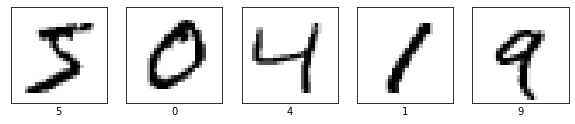

In [62]:
#display images along with label
plt.figure(figsize = (10,10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(train_labels[i])

In [63]:
#before scaling
np.unique(train_images[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

In [64]:
train_images = train_images / 255
test_images = test_images / 255

In [65]:
np.unique(train_images[0])
np.unique(test_images[0])

array([0.        , 0.00392157, 0.01176471, 0.01960784, 0.03529412,
       0.05490196, 0.06666667, 0.07058824, 0.0745098 , 0.08235294,
       0.08627451, 0.12156863, 0.1372549 , 0.14117647, 0.14901961,
       0.15686275, 0.17254902, 0.20392157, 0.22352941, 0.22745098,
       0.23137255, 0.23529412, 0.23921569, 0.24313725, 0.25882353,
       0.2627451 , 0.28235294, 0.29411765, 0.30196078, 0.3254902 ,
       0.32941176, 0.41568627, 0.44705882, 0.45098039, 0.4745098 ,
       0.49411765, 0.50588235, 0.52156863, 0.54901961, 0.59215686,
       0.62352941, 0.63921569, 0.65098039, 0.66666667, 0.71372549,
       0.7254902 , 0.73333333, 0.77647059, 0.79607843, 0.80392157,
       0.81176471, 0.81960784, 0.85882353, 0.86666667, 0.87058824,
       0.87843137, 0.88235294, 0.89019608, 0.89803922, 0.91372549,
       0.9254902 , 0.93333333, 0.94117647, 0.94509804, 0.94901961,
       0.97254902, 0.97647059, 0.98039216, 0.98431373, 0.99215686,
       0.99607843, 1.        ])

In [67]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)), 
                          keras.layers.Dense(128, activation = 'sigmoid'), 
                          keras.layers.Dense(10, activation = 'softmax')])

In [68]:
hidden_layer = model.layers[1]
weights = hidden_layer.get_weights()
print('Shape of weights', np.shape(weights[0]))
print('Shape of bias', np.shape(weights[1]))

Shape of weights (784, 128)
Shape of bias (128,)


In [70]:
output_layer = model.layers[2]
weights = output_layer.get_weights()
print('Shape of weights', np.shape(weights[0]))
print('Shape of bias', np.shape(weights[1]))

Shape of weights (128, 10)
Shape of bias (10,)


In [71]:
sgd = keras.optimizers.SGD(lr = 0.5, decay = 1e-6, momentum = 0.5)
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [73]:
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 100, validation_split = 0.1)

Epoch 1/10
540/540 [==============================] - 7s 6ms/step - loss: 0.6755 - accuracy: 0.8029 - val_loss: 0.2119 - val_accuracy: 0.9368
Epoch 2/10
540/540 [==============================] - 2s 3ms/step - loss: 0.2354 - accuracy: 0.9299 - val_loss: 0.1534 - val_accuracy: 0.9578
Epoch 3/10
540/540 [==============================] - 1s 3ms/step - loss: 0.1768 - accuracy: 0.9475 - val_loss: 0.1258 - val_accuracy: 0.9665
Epoch 4/10
540/540 [==============================] - 2s 3ms/step - loss: 0.1378 - accuracy: 0.9595 - val_loss: 0.1081 - val_accuracy: 0.9705
Epoch 5/10
540/540 [==============================] - 2s 4ms/step - loss: 0.1138 - accuracy: 0.9670 - val_loss: 0.0973 - val_accuracy: 0.9718
Epoch 6/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0977 - accuracy: 0.9728 - val_loss: 0.0906 - val_accuracy: 0.9740
Epoch 7/10
540/540 [==============================] - 2s 3ms/step - loss: 0.0838 - accuracy: 0.9762 - val_loss: 0.0826 - val_accuracy: 0.9755
Epoch 

Text(0, 0.5, 'Loss')

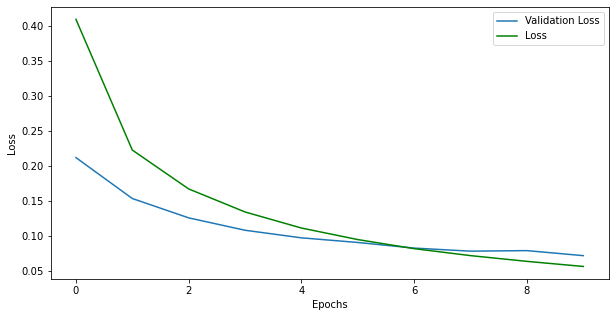

In [74]:
val_losses = history.history['val_loss']
losses = history.history['loss']
indices = range(len(losses))
plt.figure(figsize = (10, 5))
plt.plot(indices, val_losses)
plt.plot(indices, losses, color = 'g')
plt.legend(['Validation Loss', 'Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [75]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Loss', test_loss)
print('Accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0804 - accuracy: 0.9754
Loss 0.08043383806943893
Accuracy 0.9753999710083008


In [77]:
predictions = model.predict(test_images)
predictions

array([[6.2820567e-07, 7.2433188e-08, 9.3976832e-06, ..., 9.9989903e-01,
        2.7198439e-07, 4.8969919e-06],
       [6.2549097e-06, 2.9537594e-04, 9.9862432e-01, ..., 6.9345946e-10,
        7.0052301e-05, 1.5388535e-09],
       [3.3946171e-07, 9.9774027e-01, 3.2084083e-04, ..., 2.9441167e-04,
        1.0070838e-03, 3.6643494e-05],
       ...,
       [3.9671408e-09, 1.4329745e-09, 2.7802033e-08, ..., 7.4058694e-06,
        5.1921479e-06, 3.7714161e-04],
       [5.7595992e-07, 2.2446025e-06, 1.9900115e-08, ..., 1.8270109e-07,
        1.5295026e-04, 2.8977810e-08],
       [1.3581880e-05, 1.3663544e-07, 1.0491841e-05, ..., 4.2108637e-09,
        7.3039183e-07, 2.3633435e-08]], dtype=float32)

In [87]:
def plot_confidence(images, labels, predictions):
    plt.figure(figsize = (15, 30))
    plt.subplots_adjust(top = 0.99, bottom = 0.01, hspace = 1.5, wspace = 0.4)
    plot_index = 0
    for i in range(len(images)):
        plot_index += 1
        plt.subplot(len(images), 2, plot_index)
        plt.imshow(images[i], cmap = plt.cm.binary)
        correct_labels = str(labels[i])
        predicted_label = str(np.argmax(predictions[i]))
        title = 'Correct Label' + str(labels[i]) + ' Predicted Labels:' + str(np.argmax(predictions[i]))
        if(predicted_label != correct_labels):
            plt.title(title, backgroundcolor = 'r', color = 'w')
        else:
            plt.title(title, backgroundcolor = 'g', color = 'w')
        plt.xticks([])
        plt.yticks([])
        
        plot_index += 1
        plt.subplot(len(images), 2, plot_index)
        plt.bar(range(10), predictions[i])
        plt.xticks(range(10))
        plt.ylim(0, 1)

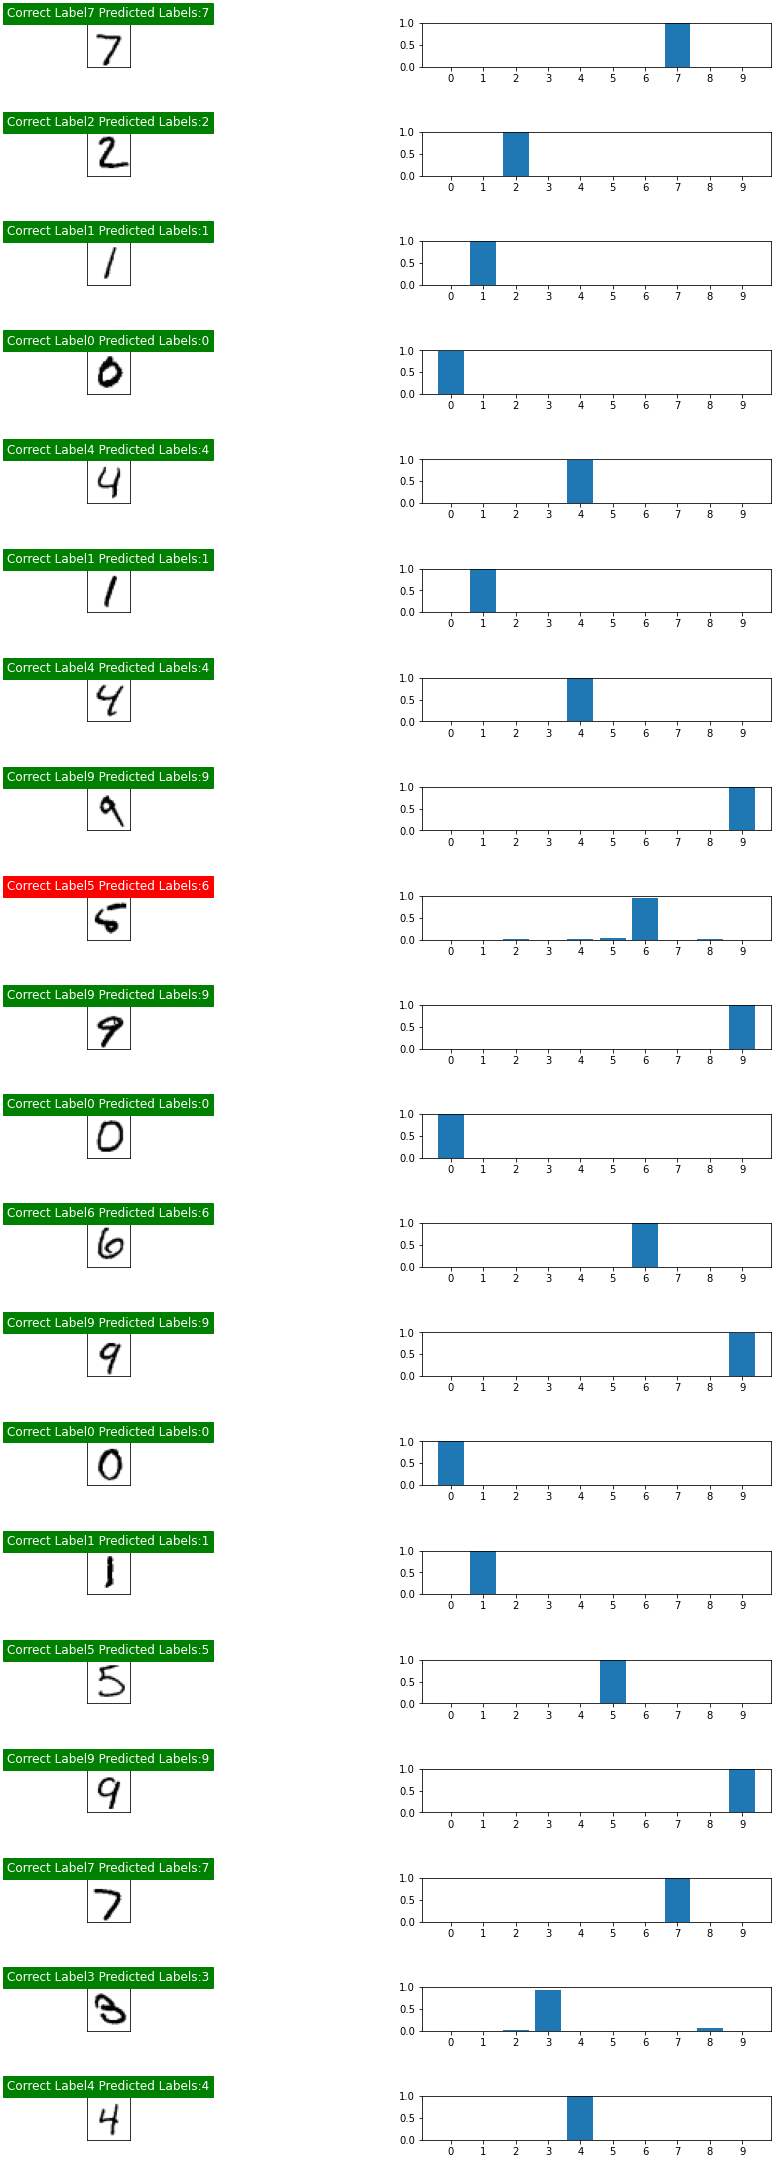

In [88]:
images = test_images[:20]
labels = test_labels[:20]
test_predictions = predictions[:20]
plot_confidence(images, labels, test_predictions)

Number of incorrect images: 246


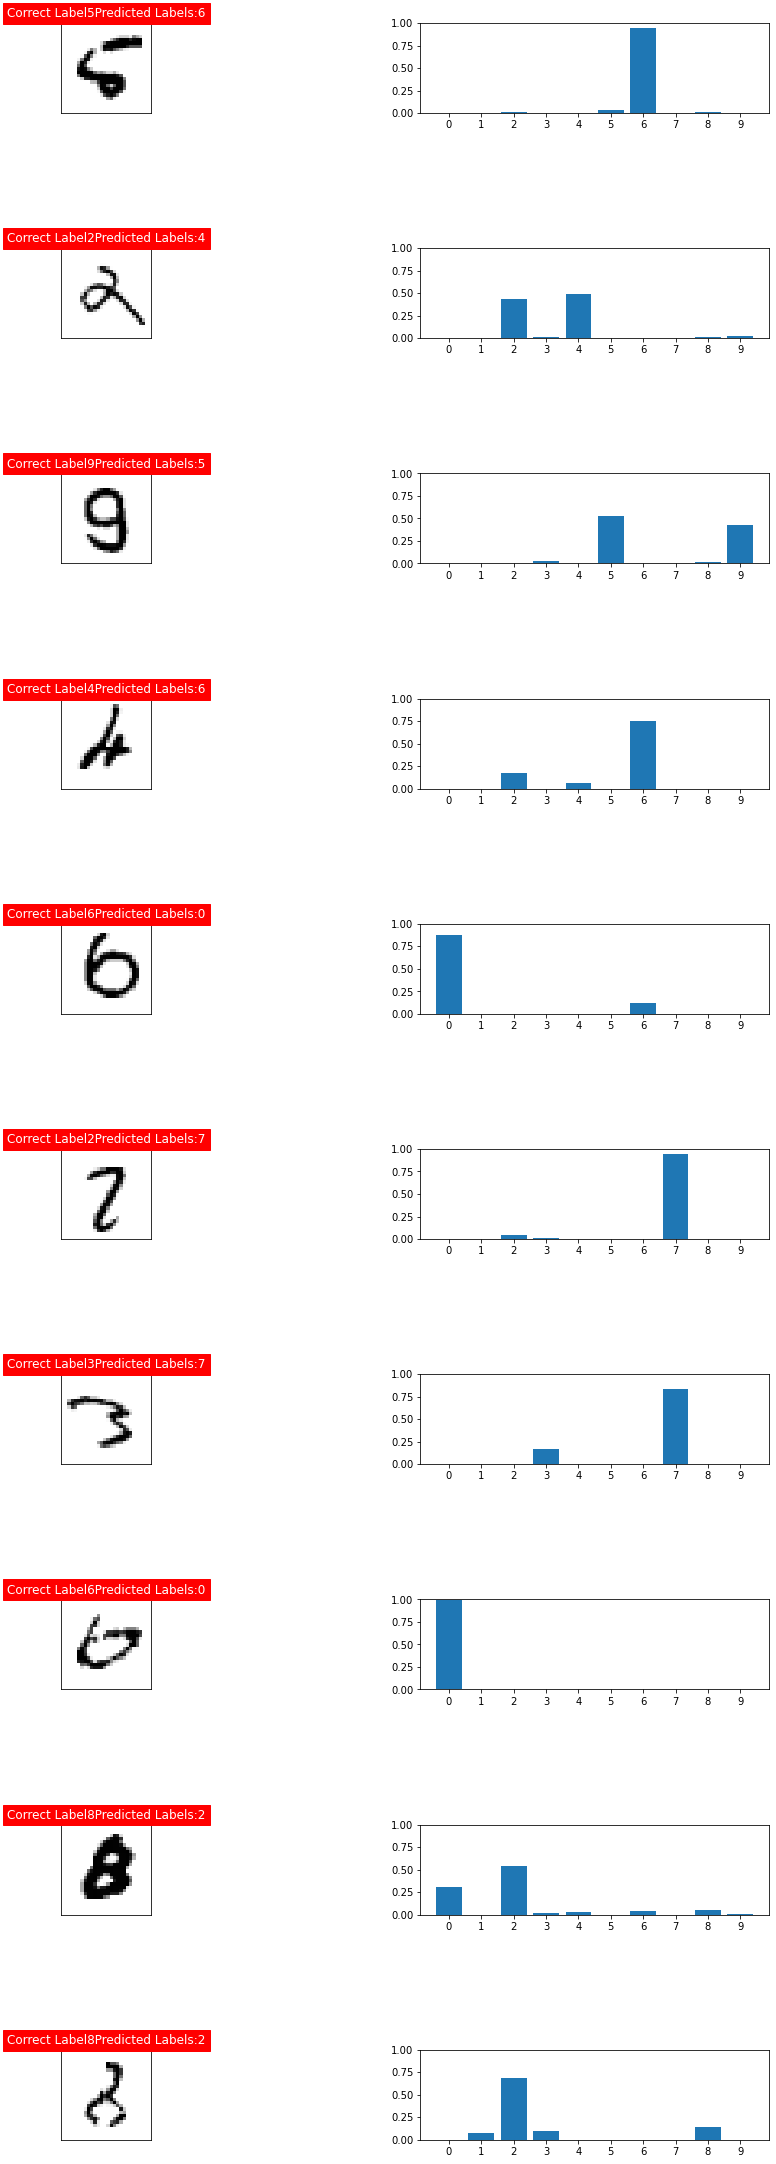

In [84]:
incorrect_indices = list()
for i in range(len(predictions)):
    predicted_label = np.argmax(predictions[i])
    if predicted_label != test_labels[i]:
        incorrect_indices.append(i)
print('Number of incorrect images:', len(incorrect_indices))
incorrect_indices = incorrect_indices[:10]
incorrect_images = [test_images[i] for i in incorrect_indices]
incorrect_labels = [test_labels[i] for i in incorrect_indices]
incorrect_predictions = [predictions[i] for i in incorrect_indices]
plot_confidence(incorrect_images, incorrect_labels, incorrect_predictions)

In [86]:
from Ipython.display import HTML


ModuleNotFoundError: No module named 'Ipython'